# **Proyek Predictive Analytics**

- Nama : Margareth Serepine S
- Cohort ID : MC319D5X0736
- Email : margareths4167@gmail.com


# **Latar Belakang Proyek**

Pendidikan merupakan fondasi utama dalam membangun sumber daya manusia. Keberhasilan siswa dalam studi mereka bergantung pada banyak faktor, mulai dari kebiasaan belajar, latar belakang keluarga, akses terhadap fasilitas belajar, tingkat kehadiran, hingga partisipasi dalam kegiatan ekstrakurikuler. Namun, tidak semua siswa menunjukkan performa akademik yang optimal.

Dalam konteks ini, kemampuan untuk memprediksi performa akademik siswa dapat membantu guru, orang tua, dan pengambil kebijakan pendidikan dalam memberikan intervensi yang tepat waktu.

Melalui proyek ini, dikembangkan model prediksi performa akademik siswa berdasarkan atribut-atribut tertentu, dengan fokus pada klasifikasi status kelulusan.

## **Import Library**

Dilakukan proses import berbagai pustaka (*libraries*) yang diperlukan untuk keperluan analisis data, visualisasi, dan pemodelan machine learning.

- `numpy`, `pandas`: Digunakan untuk manipulasi data numerik dan pengolahan data tabular.
- `matplotlib.pyplot`, `seaborn`: Digunakan untuk membuat visualisasi data, baik yang bersifat eksploratif maupun untuk penyajian hasil.
- `os`, `shutil`: Pustaka bawaan Python untuk operasi file dan direktori.
- `kagglehub`: Digunakan untuk mengunduh model atau dataset dari Kaggle Hub.

- `LabelEncoder`: Untuk mengubah label kategorikal menjadi format numerik.
- `train_test_split`: Untuk membagi dataset menjadi data latih dan data uji.
- `DecisionTreeClassifier`, `RandomForestClassifier`: Algoritma klasifikasi berbasis pohon keputusan.
- `RandomizedSearchCV`: Digunakan untuk melakukan pencarian hyperparameter secara acak (*randomized search*) pada model.
- `classification_report`, `confusion_matrix`, `accuracy_score`, `precision_score`, `recall_score`, `f1_score`: Berfungsi untuk mengevaluasi performa model klasifikasi melalui berbagai metrik evaluasi.

Dengan library-library ini, pipeline analisis dan pemodelan machine learning dapat dibangun dengan lebih efisien dan terstruktur.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import shutil
import kagglehub

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


## **Load Data**

Mengunduh Dataset dari Kaggle Hub menggunakan pustaka `kagglehub`.

In [2]:
path = kagglehub.dataset_download("amrmaree/student-performance-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-performance-prediction


In [3]:
path

'/kaggle/input/student-performance-prediction'

In [4]:
path = ''.join([path, '/', os.listdir(path)[0]])
path

'/kaggle/input/student-performance-prediction/student_performance_dataset.csv'

Setelah dataset berhasil diunduh, langkah selanjutnya adalah menentukan path lengkap menuju folder yang berisi file dataset.


In [5]:
df = pd.read_csv(path)
df

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass
...,...,...,...,...,...,...,...,...,...,...
703,S492,Male,14,84.658761,78,PhD,Yes,No,50,Fail
704,S301,Male,35,60.278990,83,Masters,No,No,62,Pass
705,S473,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail
706,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass


Memuat dataset dan mengecek ukuran dataset

In [6]:
df.shape

(708, 10)

Hasil `(708, 10)` menunjukkan bahwa dataset memiliki:

- 708 baris (rows): merepresentasikan jumlah observasi atau data siswa.
- 10 kolom (columns): merepresentasikan fitur atau atribut yang tersedia untuk setiap observasi.


## **Data Feature**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB


Deskripsi fitur (kolom) :
- `Student_ID` : Pengenal unik untuk setiap siswa.  
- `Gender` : Jenis kelamin siswa (Pria / Wanita).  
- `Study_Hours_per_Week` : Jumlah rata-rata jam belajar per minggu.  
- `Attendance_Rate` : Persentase kehadiran siswa (50% - 100%).  
- `Past_Exam_Scores` : Nilai rata-rata ujian sebelumnya (50 - 100).  
- `Parental_Education_Level` : Tingkat pendidikan orang tua (SMA, S1, S2, `S3`).  
- `Internet_Access_at_Home` : Akses internet di rumah (Ya / Tidak).  
- `Extracurricular_Activities` : Keikutsertaan dalam kegiatan ekstrakurikuler (Ya` / `Tidak).  
- `Final_Exam_Score`: Nilai ujian akhir siswa (50 - 100, bilangan bulat).  
- `Pass_Fail` : Status kelulusan siswa (Lulus / Gagal). [Target]






Menampilkan Statistik Deskriptif

In [8]:
df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


1. `Study_Hours_per_Week`: Mayoritas siswa menghabiskan waktu belajar sekitar 26 jam per minggu, dengan sebagian besar berada di rentang 19 hingga 34 jam. Nilai minimum menunjukkan ada siswa yang hanya belajar selama 10 jam, sedangkan yang paling rajin bisa mencapai 39 jam per minggu. Ini menunjukkan adanya variasi kebiasaan belajar yang cukup signifikan antar siswa.

2. `Attendance_Rate` : Rata-rata kehadiran siswa adalah sekitar 78%, dengan mayoritas siswa memiliki tingkat kehadiran antara 67% hingga 89%. Walaupun ada siswa dengan kehadiran mendekati sempurna (99,97%), masih terdapat pula siswa dengan tingkat kehadiran minimal sekitar 50%. Hal ini menunjukkan tingkat kedisiplinan siswa dalam mengikuti kegiatan belajar cukup beragam.

3. `Past_Exam_Scores` : Secara umum, performa akademik siswa pada ujian-ujian sebelumnya cukup baik, dengan nilai rata-rata mendekati 78 dan nilai median sebesar 79. Sebagian besar siswa memiliki nilai di antara 65 hingga 91. Terdapat siswa yang berhasil memperoleh nilai sempurna (100), meskipun ada pula yang mendapatkan nilai minimum (50). Ini menandakan bahwa secara historis, banyak siswa memiliki potensi akademik yang tinggi.

4. `Final_Exam_Score` : Berbeda dengan nilai ujian sebelumnya, rata-rata nilai ujian akhir hanya sekitar 58, dengan rentang nilai yang jauh lebih sempit (50–77) dan standar deviasi yang lebih kecil. Ini menunjukkan bahwa hasil ujian akhir cenderung lebih rendah dan lebih seragam dibandingkan ujian sebelumnya. Meskipun banyak siswa memiliki latar belakang akademik yang baik, nilai akhir ini menunjukkan adanya penurunan performa secara umum.


## **Data Checking**

Deteksi Nilai yang Hilang/Kosong (Missing Values)

In [9]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


Deteksi baris yang duplikat

In [10]:
df.duplicated().sum()

np.int64(208)

Hasil `np.int64(208)` menunjukkan ada 208 baris data yang terdeteksi sebagai duplikat.

## **Split Feature (Column) Type**

Memisahkan jenis kolom berdasarkan datanya

Daftar nama-nama fitur (kolom) pada dataset

In [11]:
df.columns

Index(['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate',
       'Past_Exam_Scores', 'Parental_Education_Level',
       'Internet_Access_at_Home', 'Extracurricular_Activities',
       'Final_Exam_Score', 'Pass_Fail'],
      dtype='object')

Daftar fitur (kolom) kategorikal

In [12]:
categorical_cols = [
    'Gender',
    'Parental_Education_Level',
    'Internet_Access_at_Home',
    'Extracurricular_Activities',
    'Pass_Fail'
]

Daftar fitur (kolom) numerik

In [13]:
numerical_cols = [
    'Study_Hours_per_Week',
    'Attendance_Rate',
    'Past_Exam_Scores',
    'Final_Exam_Score'
]

## **Data Visualization**

**1. Visualisasi Fitur Numerik**

Menampilkan histogram dari seluruh fitur numerik dalam dataset, untuk melihat distribusi data masing-masing kolom.

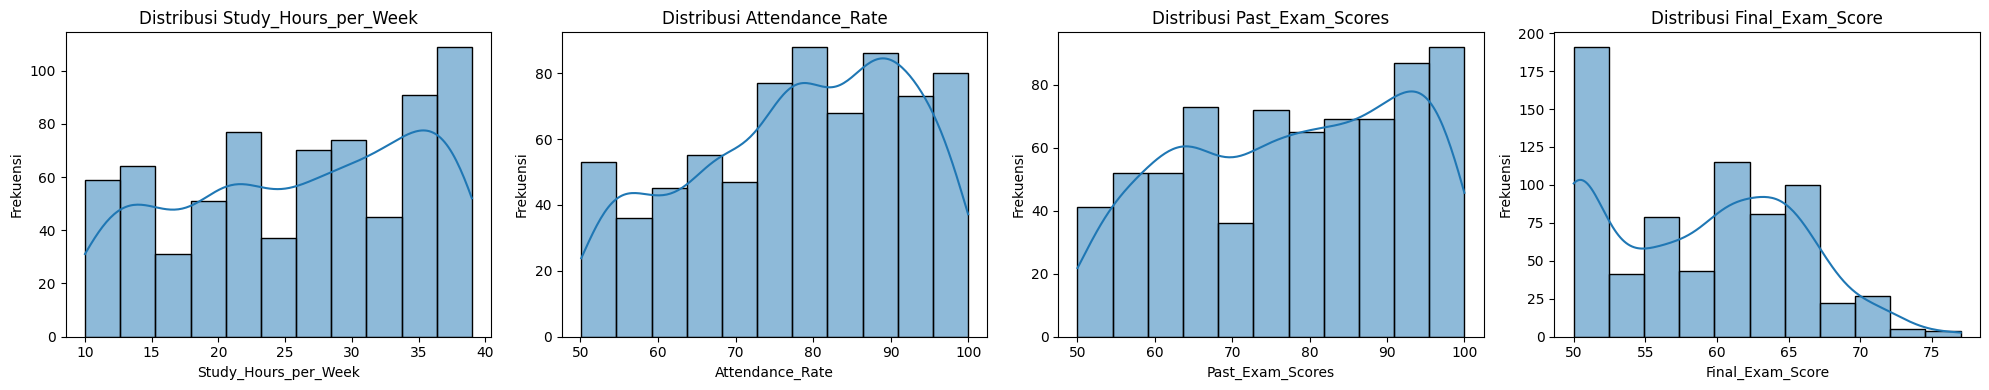

In [14]:
n_cols = 4
n_vars = len(numerical_cols)
n_rows = -(-n_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, column in enumerate(numerical_cols):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frekuensi')
    axes[i].set_title(f'Distribusi {column}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Distribusi hasil visualisasi:
-  `Study_Hours_per_Week` : Distribusi menunjukkan sebagian besar siswa belajar antara 30–40 jam per minggu. Sebagian besar siswa memiliki waktu belajar mingguan yang tinggi.
- `Attendance_Rate` : Distribusi relatif merata, tetapi ada konsentrasi tinggi di kisaran 80–100%. Mayoritas siswa memiliki tingkat kehadiran tinggi, menunjukkan disiplin yang cukup baik dalam mengikuti kelas.
- `Past_Exam_Scores` : Distribusi sedikit condong ke kiri (negatif skewed, dengan banyak siswa mendapat nilai ujian sebelumnya tinggi (80–100). Rata-rata siswa memiliki performa akademik yang baik pada ujian sebelumnya.
- `Final_Exam_Score` : Distribusi sangat condong ke kanan (positif skewed), menunjukkan mayoritas siswa mendapatkan nilai ujian akhir yang rendah, yakni antara 50–65. Sangat sedikit siswa yang mendapat nilai di atas 70. Terdapat penurunan performa pada ujian akhir, meskipun performa sebelumnya tinggi.

**2. Visualisasi Nilai Outlier Fitur Numerik**

Memberikan gambaran tentang nilai sebaran data (outlier) untuk masing-masing variabel numerik.

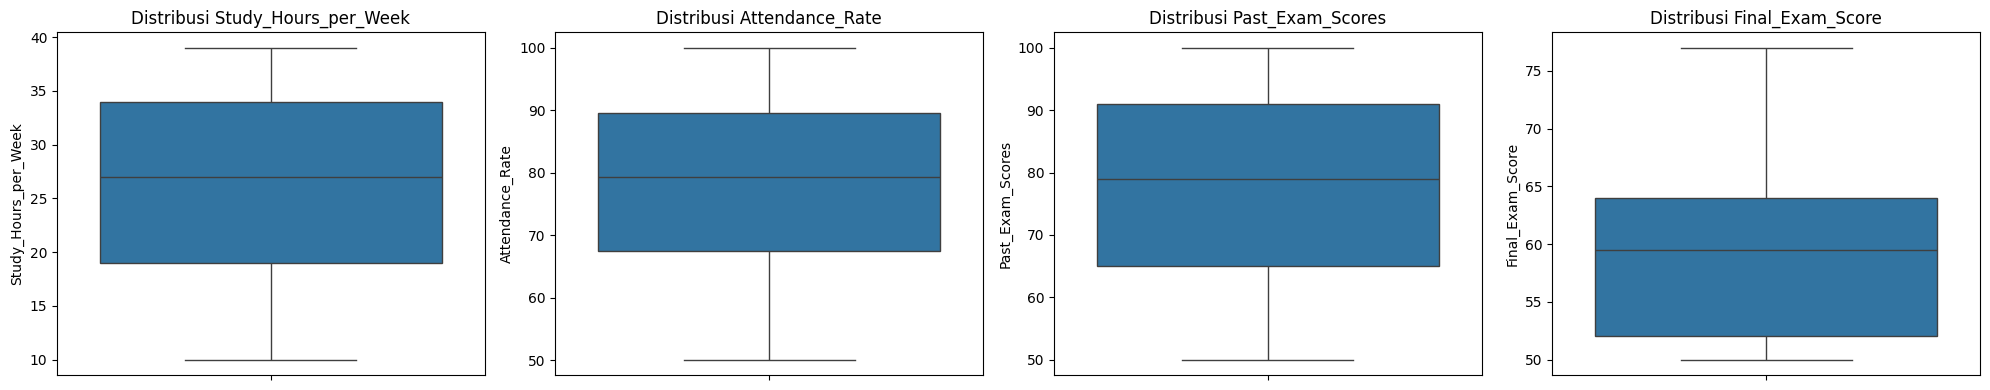

In [15]:
n_cols = 4
n_vars = len(numerical_cols)
n_rows = -(-n_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, column in enumerate(numerical_cols):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Distribusi {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Distribusi hasil :
- Distribusi nilai cukup normal dan simetris.
- Tidak ada outlier ekstrem yang terdeteksi dalam fitur-fitur ini, yang menunjukkan bahwa data relatif bersih dari nilai-nilai ekstrem yang jauh berbeda dari mayoritas data.

**3. Visualisasi Fitur Kategorikal**

Memvisualisasikan distribusi frekuensi dari setiap fitur kategorikal dalam dataset untuk memahami jumlah atau proporsi setiap kategori dari fitur-fitur tersebut, memberikan gambaran awal tentang komposisi data kategorikal.

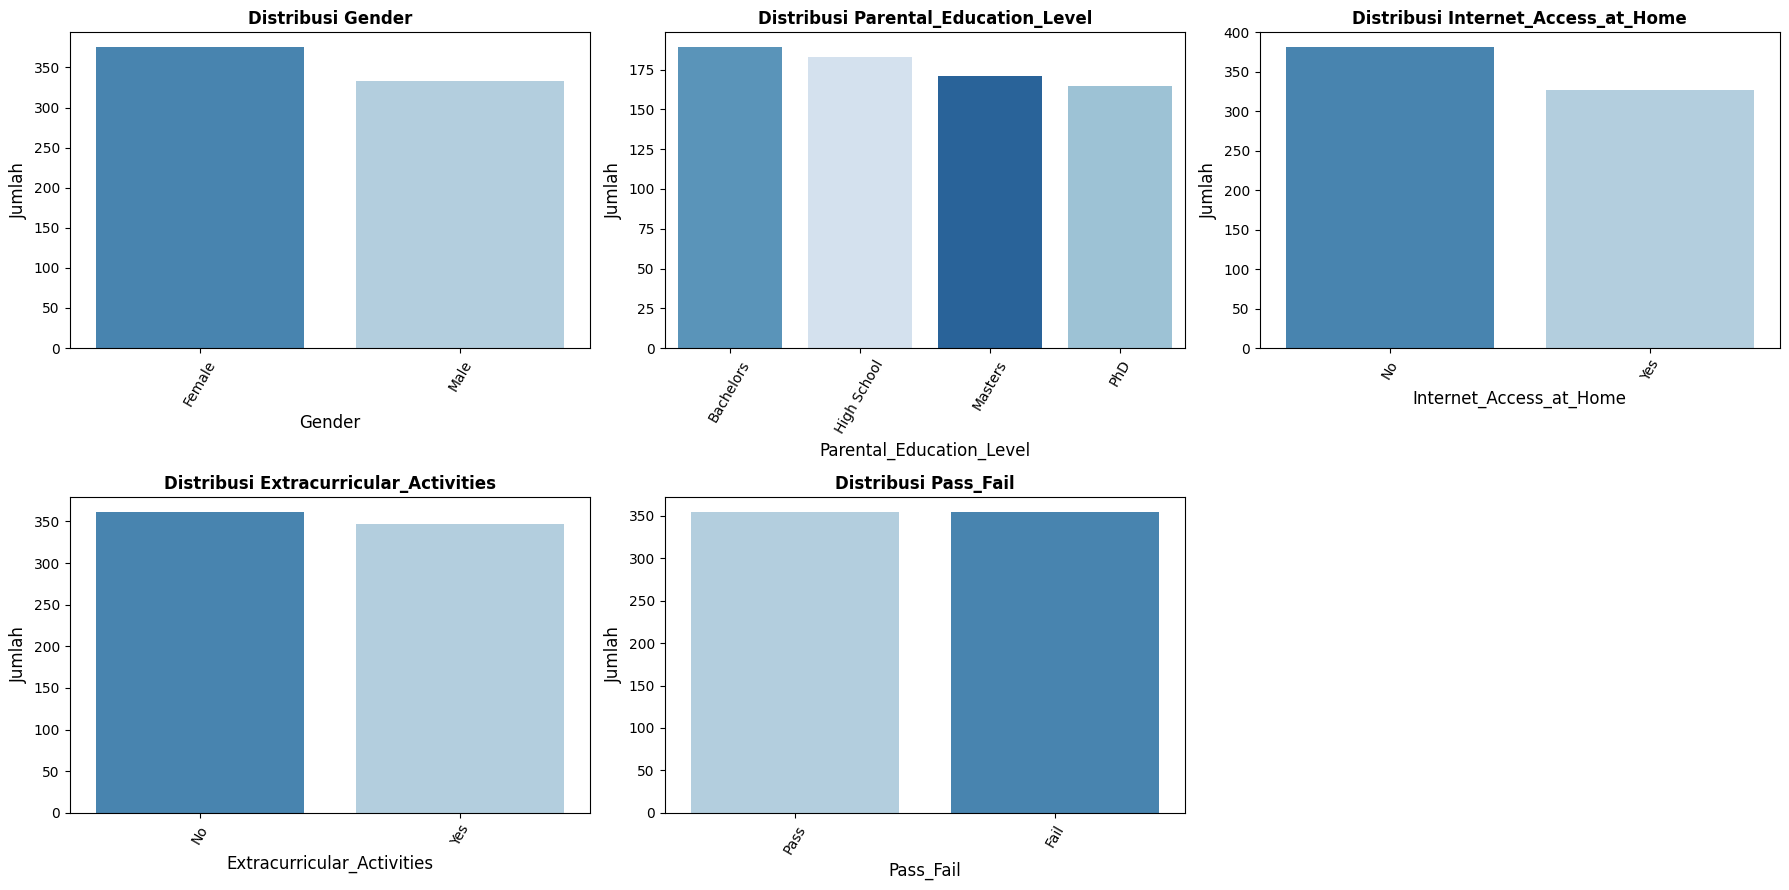

In [16]:
categorical_orders = {col: df[col].value_counts().index.tolist() for col in categorical_cols}

# Setup layout grid
n_cols = 3
n_vars = len(categorical_cols)
n_rows = -(-n_vars // n_cols)  # Pembulatan ke atas

# Buat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4.5 * n_rows))
axes = axes.flatten()

# Plot countplot untuk setiap kolom kategorikal
for i, column in enumerate(categorical_cols):
    sns.countplot(
        data=df,
        x=column,
        order=categorical_orders[column],
        hue=column,               # Tambahkan hue agar tidak warning
        palette="Blues",          # Elegan dan kalem
        legend=False,
        ax=axes[i]
    )

    axes[i].set_title(f'Distribusi {column}', fontweight='bold', color='black')
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Jumlah', fontsize=12)
    axes[i].tick_params(axis='x', rotation=60, labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Distribusi hasil visualisasi:
- `Gender` : Menunjukkan bahwa jumlah perempuan (Female) sedikit lebih banyak dibandingkan laki-laki (Male). Jadi, distribusi gender cukup seimbang, tetapi perempuan sedikit mendominasi dalam data ini.
- `Parental_Education_Level` : Sebagian besar orang tua memiliki pendidikan tingkat Bachelor dan High School. Jumlah orang tua dengan gelar PhD yang paling sedikit. Mayoritas siswa berasal dari keluarga dengan latar belakang pendidikan menengah hingga sarjana.
- `Internet_Access_at_Home` : Mayoritas siswa tidak memiliki akses internet di rumah, sedikit lebih banyak daripada yang memiliki.
- `Extracurricular_Activities` : Jumlah siswa yang tidak mengikuti kegiatan ekstrakurikuler sedikit lebih banyak daripada yang mengikuti. Keterlibatan dalam aktivitas ekstrakurikuler cukup berimbang, dengan sedikit kecenderungan untuk tidak ikut.
- `Pass_Fail`: Jumlah siswa yang lulus (Pass) hampir sama dengan yang gagal (Fail). Performa akademik siswa cukup seimbang antara yang berhasil dan tidak berhasil.

**4. Visualisasi Matriks Korelasi Fitur Numerik**

Menganalisis hubungan linier antar fitur numerik dalam dataset untuk mengidentifikasi fitur yang memiliki hubungan positif kuat, negatif kuat, atau hampir tidak ada hubungan sama sekali.

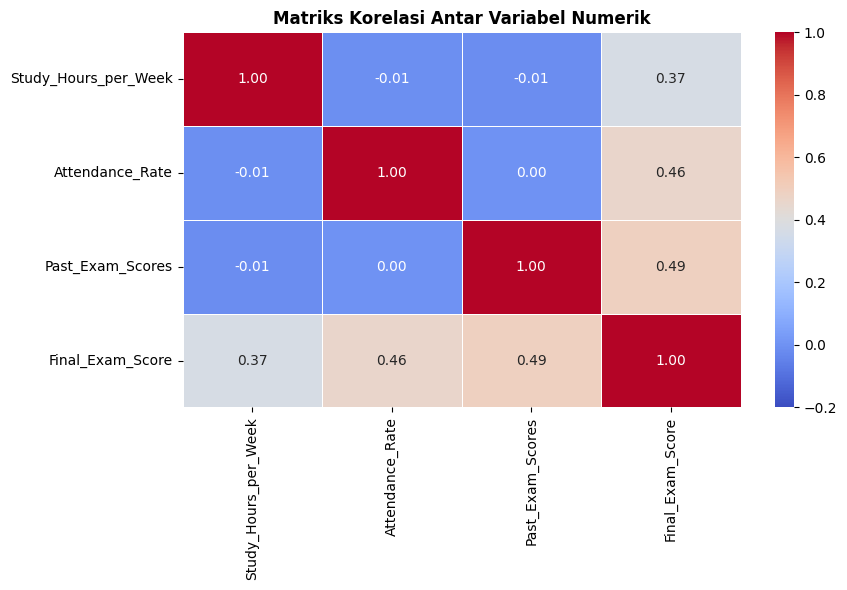

In [17]:
numerical_corr = df[numerical_cols].corr()
plt.figure(figsize=(9,6))
sns.heatmap(numerical_corr, annot=True, cmap="coolwarm",fmt=".2f",vmin=-0.2, vmax=1, linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel Numerik",fontweight='bold')
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


Distribusi hasil :
- Secara visual dan numerik mengkonfirmasi hubungan antar fitur, menyoroti faktor-faktor yang berpotensi memengaruhi `Final_Exam_Score`.
- Hasil menunjukkan bahwa `Past_Exam_Scores` dan `Attendance_Rate` adalah prediktor yang cukup baik untuk `Final_Exam_Score`, karena keduanya memiliki korelasi positif sedang.

## **Data Preparation**

**Data Cleaning**

Menghapus semua baris yang terdeteksi duplikat

In [18]:
df = df.drop_duplicates()

Menghapus kolom `Student_ID`

In [19]:
df.drop(columns=['Student_ID'], inplace=True)

<ipython-input-19-46903fbf5e41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Student_ID'], inplace=True)


Kolom `Student_ID` bertipe data string sebagai pengenal unik siswa, jadi tidak termasuk jenis kolom numerikal ataupun kategorikal. Karena kolom `Student_ID` tidak digunakan, maka kolom tersebut dihapus.

**Encoding Fitur kategorikal**

Mengubah fitur kategorikal menjadi format numerik yang dapat diproses oleh algoritma machine learning. Dengan menggunakan `LabelEncoder`, setiap kategori unik dalam suatu kolom direpresentasikan sebagai bilangan bulat.


In [20]:
df_encoded = df.copy()
categorical_cols = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home',
                    'Extracurricular_Activities', 'Pass_Fail']

# Melakukan encoding dengan LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,1,31,68.267841,86,1,1,1,63,1
1,1,16,78.222927,73,3,0,0,50,0
2,0,21,87.525096,74,3,1,0,55,0
3,0,27,92.076483,99,0,0,0,65,1
4,0,37,98.655517,63,2,0,1,70,1


Label encoding tiap fitur:
- `Gender`: 'Female' = 0, 'Male' = 1
- `Parental_Education_Level` : 'Bachelors' = 0, 'High school' = 1, 'Masters' = 2, 'PhD' = 3
- `Internet_Access_at_Home` : No = 0, Yes = 1
- `Extracurricular_Activities` : No = 0, Yes = 1
- `Pass_Fail` : Fail = 0, Pass = 1

## **Data Spliting**

Memisahkan data fitur dan target, lalu melakukan pembagian dataset menjadi 80% data pelatihan (training) dan 20% pengujian (testing) sebelum dilakukan proses pemodelan.

In [21]:
X = df_encoded.drop(columns=['Pass_Fail'], axis=1)
y = df_encoded['Pass_Fail']

# Split data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 8), (100, 8), (400,), (100,))

Menampilkan ukuran dari masing masing data yang dibagi

In [22]:
print("Total Data:", len(df_encoded))
print("Total Train Data:", len(X_train))
print("Total Test Data:", len(X_test))

Total Data: 500
Total Train Data: 400
Total Test Data: 100


## **Modeling**

Membangun dan membandingkan model machine learning guna mengklasifikasikan status kelulusan siswa (Pass/Fail) berdasarkan fitur-fitur yang tersedia dalam dataset. Dalam proyek ini, digunakan dua algoritma klasifikasi yaitu Decision Tree dan Random Forest, disertai proses peningkatan performa melalui hyperparameter tuning.

**1. Decision Tree Classifier**

Menggunakan `DecisionTreeClassifier` dari pustaka sklearn.tree, kemudian dilatih pada data training. Prediksi dilakukan pada data test dan evaluasi menggunakan metrik akurasi, precision, recall, dan F1-score.

In [23]:
# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_dt = dt_model.predict(X_test)

# Evaluasi model baseline
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))


Confusion Matrix (Decision Tree):
[[75  0]
 [ 0 25]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        25

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Menunjukkan hasil sempurna (100%) di seluruh metrik evaluasi, baik pada kelas "Pass" maupun "Fail". Artinya, model mampu memisahkan kedua kelas tanpa kesalahan. Namun, hasil ini perlu diwaspadai sebagai kemungkinan overfitting, terutama jika data terlalu sederhana atau tidak cukup variatif.

**2. Random Forest Classifier (Hyperparamater Tuning)**

Menggabungkan beberapa Decision Tree untuk menghasilkan model yang lebih stabil dan akurat. Setiap pohon dilatih pada subset data yang berbeda dan hasil prediksi diambil berdasarkan mayoritas.
Model dibangun menggunakan `RandomForestClassifier` dari `sklearn`.ensemble, dan dilatih dengan parameter default terlebih dahulu.

In [24]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Randomized Search CV
rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)

# Prediksi hasil terbaik
y_pred_rf = rf_search.predict(X_test)

# Evaluasi model terbaik
print("Best Parameters (Random Forest):")
print(rf_search.best_params_)
print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters (Random Forest):
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}

Confusion Matrix (Random Forest):
[[75  0]
 [ 0 25]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        25

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Hyperparameter Tuning dilakukan untuk mencari kombinasi parameter terbaik agar performa model Random Forest dapat meningkat, dan model dapat melakukan prediksi dengan akurasi tinggi, menghindari overfitting maupun underfitting.

Model Random Forest juga menunjukkan akurasi sempurna, bahkan setelah dilakukan hyperparameter tuning.

Hal ini mengindikasikan bahwa model berhasil menggeneralisasi pola dengan sangat baik di dataset ini

**Perbandingan untuk Pemilihan Model Terbaik**

In [25]:
# Fungsi untuk evaluasi model
def evaluate_model(name, y_true, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, pos_label=1),
        'Recall': recall_score(y_true, y_pred, pos_label=1),
        'F1 Score': f1_score(y_true, y_pred, pos_label=1)
    }

# Evaluasi kedua model
dt_metrics = evaluate_model("Decision Tree", y_test, y_pred_dt)
rf_metrics = evaluate_model("Random Forest", y_test, y_pred_rf)

comparison_df = pd.DataFrame([dt_metrics, rf_metrics])

print("Perbandingan Kinerja Model:")
display(comparison_df)


Perbandingan Kinerja Model:


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0


**Visualisasi Perbandingan untuk Pemilihan Model Terbaik**

<Figure size 1000x600 with 0 Axes>

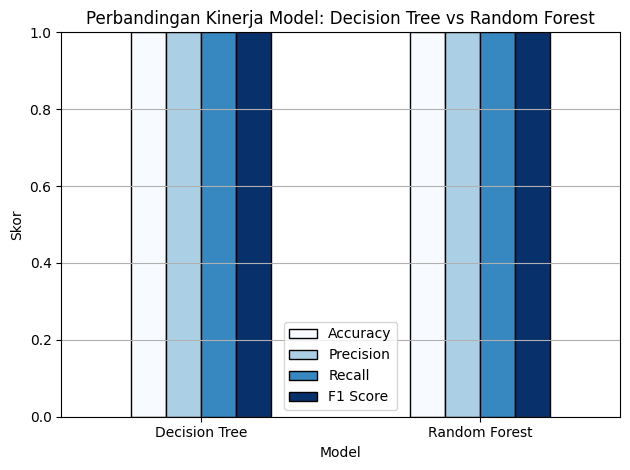

In [26]:
plt.figure(figsize=(10, 6))
comparison_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(
    kind='bar', ylim=(0, 1), title='Perbandingan Kinerja Model: Decision Tree vs Random Forest',
    rot=0, colormap='Blues', edgecolor='black'
)
plt.ylabel("Skor")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Setelah dilakukan perbandingan pada kedua algoritma:
1. Decision Tree memberikan hasil yang baik namun lebih rentan overfitting.
2. Random Forest dengan Hyperparameter Tuning menunjukkan hasil yang lebih akurat dan stabil.

Maka, model Random Forest dengan Hyperparameter Tuning dipilih sebagai model terbaik.

**Feature Importance**

Mengecek dan menampilkan fitur-fitur yang paling berpengaruh

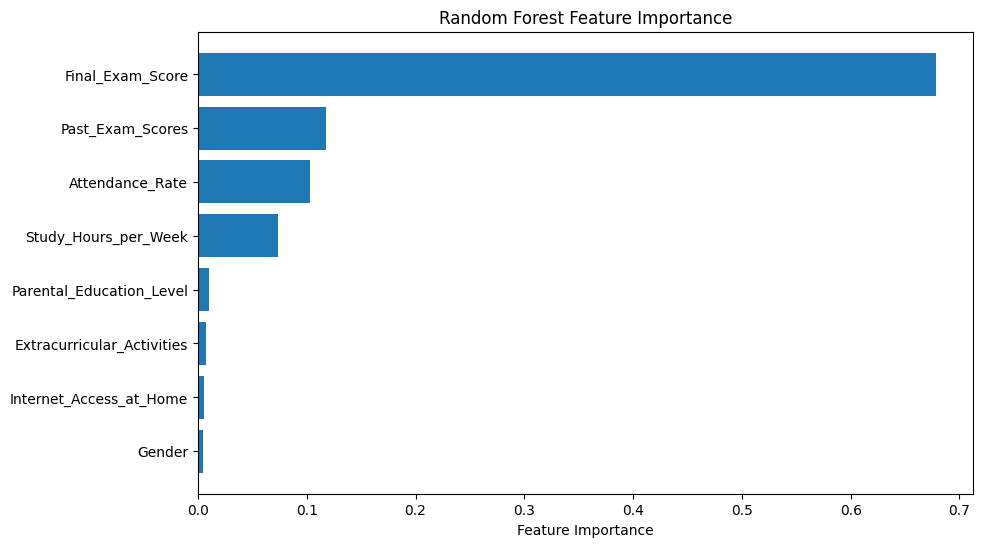

In [27]:
# Ambil fitur dan importance
importances = rf_search.best_estimator_.feature_importances_
features = X.columns

# Buat DataFrame dan urutkan
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

Berdasarkan hasil feature importance fitur-fitur yang paling signifikan yaitu:
1. `Final_Exam_Score`
2. `Past_Exam_Scores`

Maka dari itu, nilai ujian akhir dan nilai ujian sebelumnya menjadi hal yang paling berpengaruh dalam menentukan kelulusan siswa. Fitur-fitur ini sejalan dengan logika domain pendidikan, dan dapat digunakan sebagai dasar untuk intervensi kebijakan akademik.